## Prediction Simulation for Water Year 2019

We will be testing and evaluating the performance of the model over the 2019 WY at select locations

For example, the operational capacity of the model should begin at the beginning of the water year (WY week 1) with a previous SWE value of 0-in for each 1-km grid.
Model evaluation could then assess the forecasting skill on a hold-out dataset of an entire year in which known neighboring values do not control predictions, but rather driving to-date predictions from the predicted previous SWE values. 
Due to the high model performance, future work will target the assessment of model skill with an operational motivation

## Model Training/Testing influence on Model Results.

The model training/testing partitioning methodology has a strong influence on model performance and the goal of model evaluation.
The objective of the modeling effort was to examine the spatial extrapolation capacity of the model from selected monitoring stations to the overall region, best suited to a 75/25% training/testing split, respectively.
While it is critical to address the strong serial correlation in SWE accumulation and melt throughout the season, the high correlation between weeks has the potential to inflate model skill when using a 75/25% training/testing split due to the previous SWE feature being known.
An assessment of the operational capacity of the model is different than assessing the ability to extrapolate regional SWE from in-situ monitoring stations.
For example, the operational capacity of the model should begin at the beginning of the water year (WY week 1) with a previous SWE value of 0-in for each 1-km grid.
Model evaluation could then assess the forecasting skill on a hold-out dataset of an entire year in which known neighboring values do not control predictions, but rather driving to-date predictions from the predicted previous SWE values. 
Due to the high model performance, future work will target the assessment of model skill with an operational motivation.

In [1]:
import os
import NSM_SCA
import Hindcast_Initialization

#Set working directories
cwd = os.getcwd()
os.chdir("..")
os.chdir("..")
datapath = os.getcwd() 

2023-10-19 16:21:22.199508: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-19 16:21:22.204685: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-19 16:21:22.204716: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
new_year = '2019'
threshold = '20.0' #This threshold is standardized for now, to recalculate see Dr. Johnson
Region_list = ['N_Sierras','S_Sierras_High', 'S_Sierras_Low']

datelist = Hindcast_Initialization.Hindcast_Initialization(cwd, datapath, new_year, threshold, Region_list)

Creating files for a historical simulation within  'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low'  regions for water year  2019
New simulation start files complete


## Run your SSM in hindcast mode to evaluate operational capacity.



In [3]:
#run the model through all time (data acqusition already completed)
for day in datelist:
    print('Updating SWE predictions for ', day)
    #connect interactive script to Wasatch Snow module
    Snow = NSM_SCA.NSM_SCA(cwd, datapath, day, threshold=threshold, Regions = Region_list)
    
    #Go get SNOTEL observations - all data currently loaded, set to True to download
    #Snow.Get_Monitoring_Data_Threaded(getdata = False)

    #Initialize/Download the granules, all data preprocessed for the SSM activity, change to True to use the functions.
    #Snow.initializeGranules(getdata = False)

    #Process observations into Model prediction ready format,
    #Snow.Data_Processing()

    #Agument with SCA
    #Snow.augmentPredictionDFs()

    #Make predictions
    Snow.SWE_Predict()

Updating SWE predictions for  2018-10-02
Making predictions for:  2018-10-02
N_Sierras


2023-10-19 16:21:25.003421: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-19 16:21:25.003462: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-19 16:21:25.003489: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-whitelightning450): /proc/driver/nvidia/version does not exist
2023-10-19 16:21:25.003751: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


72/72 [==============================] - 0s 1ms/step
S_Sierras_High
6/6 [==============================] - 0s 2ms/step
S_Sierras_Low
6/6 [==============================] - 0s 2ms/step
Updating SWE predictions for  2018-10-09
Making predictions for:  2018-10-09
N_Sierras
2/2 [==============================] - 0s 4ms/step
S_Sierras_High
2/2 [==============================] - 0s 4ms/step
S_Sierras_Low
1/1 [==============================] - 0s 69ms/step
Updating SWE predictions for  2018-10-16
Making predictions for:  2018-10-16
N_Sierras
6/6 [==============================] - 0s 2ms/step
S_Sierras_High
1/1 [==============================] - 0s 72ms/step
S_Sierras_Low
No snow in region:  S_Sierras_Low
Updating SWE predictions for  2018-10-23
Making predictions for:  2018-10-23
N_Sierras
3/3 [==============================] - 0s 2ms/step
S_Sierras_High
1/1 [==============================] - 0s 67ms/step
S_Sierras_Low
1/1 [==============================] - 0s 71ms/step
Updating SWE predictio

processing predictions into geodataframe


100%|██████████| 39/39 [00:00<00:00, 52.72it/s]


creating figures for each prediction timestep


100%|██████████| 39/39 [00:35<00:00,  1.09it/s]


Figures complete, creating .gif image


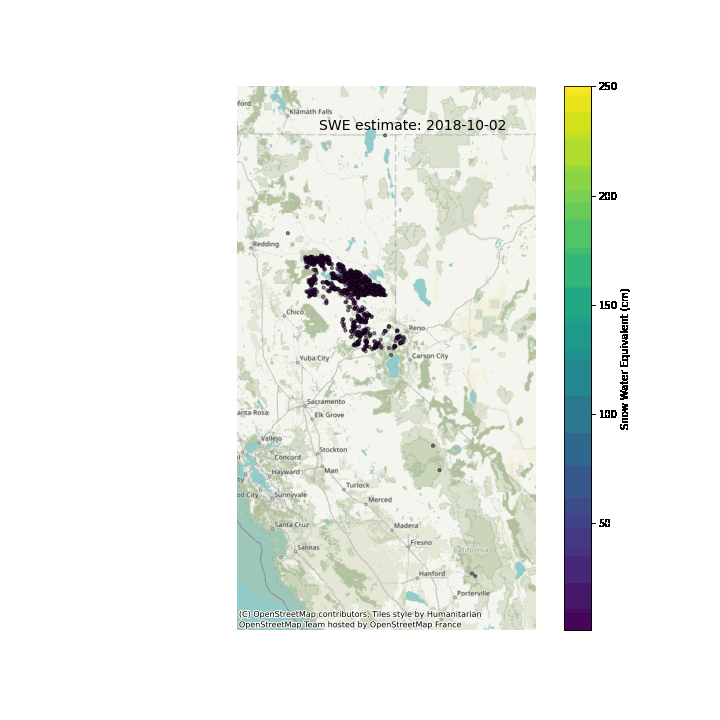

In [4]:
Hindcast_Initialization.Snowgif(cwd, datelist, Region_list)

### Model Hindcast complete

Lets see how your model performs within SSWEET in the [Hindcast_Evaluation](./Hindcast_Evaluation.ipynb) notebook.